In [1]:
import scipy
print(scipy.version)

<module 'scipy.version' from 'C:\\Users\\KIIT\\anaconda3\\envs\\myenv\\lib\\site-packages\\scipy\\version.py'>


In [1]:
pip install torch==0.4.1

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib==3.2.2

Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
print(np.__version__)


1.19.5


In [3]:
pip install scikit-learn==0.19.2

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python==4.5.3.56

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install imageio==2.16.0

  Using cached imageio-2.16.0-py3-none-any.whl (3.3 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement numpy>=1.20.0 (from imageio) (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5)
ERROR: No matching distribution found for numpy>=1.20.0


In [8]:
import os
import glob
import random
import shutil
from tempfile import gettempdir
from IPython.display import clear_output, Image
from torchvision.datasets.folder import pil_loader
from model import Net
from utils import pil_to_model_tensor_transform
import consts

# UTKFace constants

MALE = 0
FEMALE = 1

WHITE = 0
BLACK = 1
ASIAN = 2
INDIAN = 3
OTHER = 4

# User constants

dset_path = os.path.join('.', 'data', 'UTKFace', 'unlabeled')
tempdir = gettempdir()

In [22]:
consts.NUM_Z_CHANNELS = 100  # we have two trained models, with 50 and 100
net = Net()
load_path = {100: r"C:\Users\KIIT\anaconda3\envs\myenv\AgeProgression-master\AgeProgression-master\trained_models\100_Z_channels_200th_epoch"}[consts.NUM_Z_CHANNELS]
net.load(load_path, slim=True)  # slim tells the net to load only the encoder and generator

[22:59] Loaded E, G from C:\Users\KIIT\anaconda3\envs\myenv\AgeProgression-master\AgeProgression-master\trained_models\100_Z_channels_200th_epoch


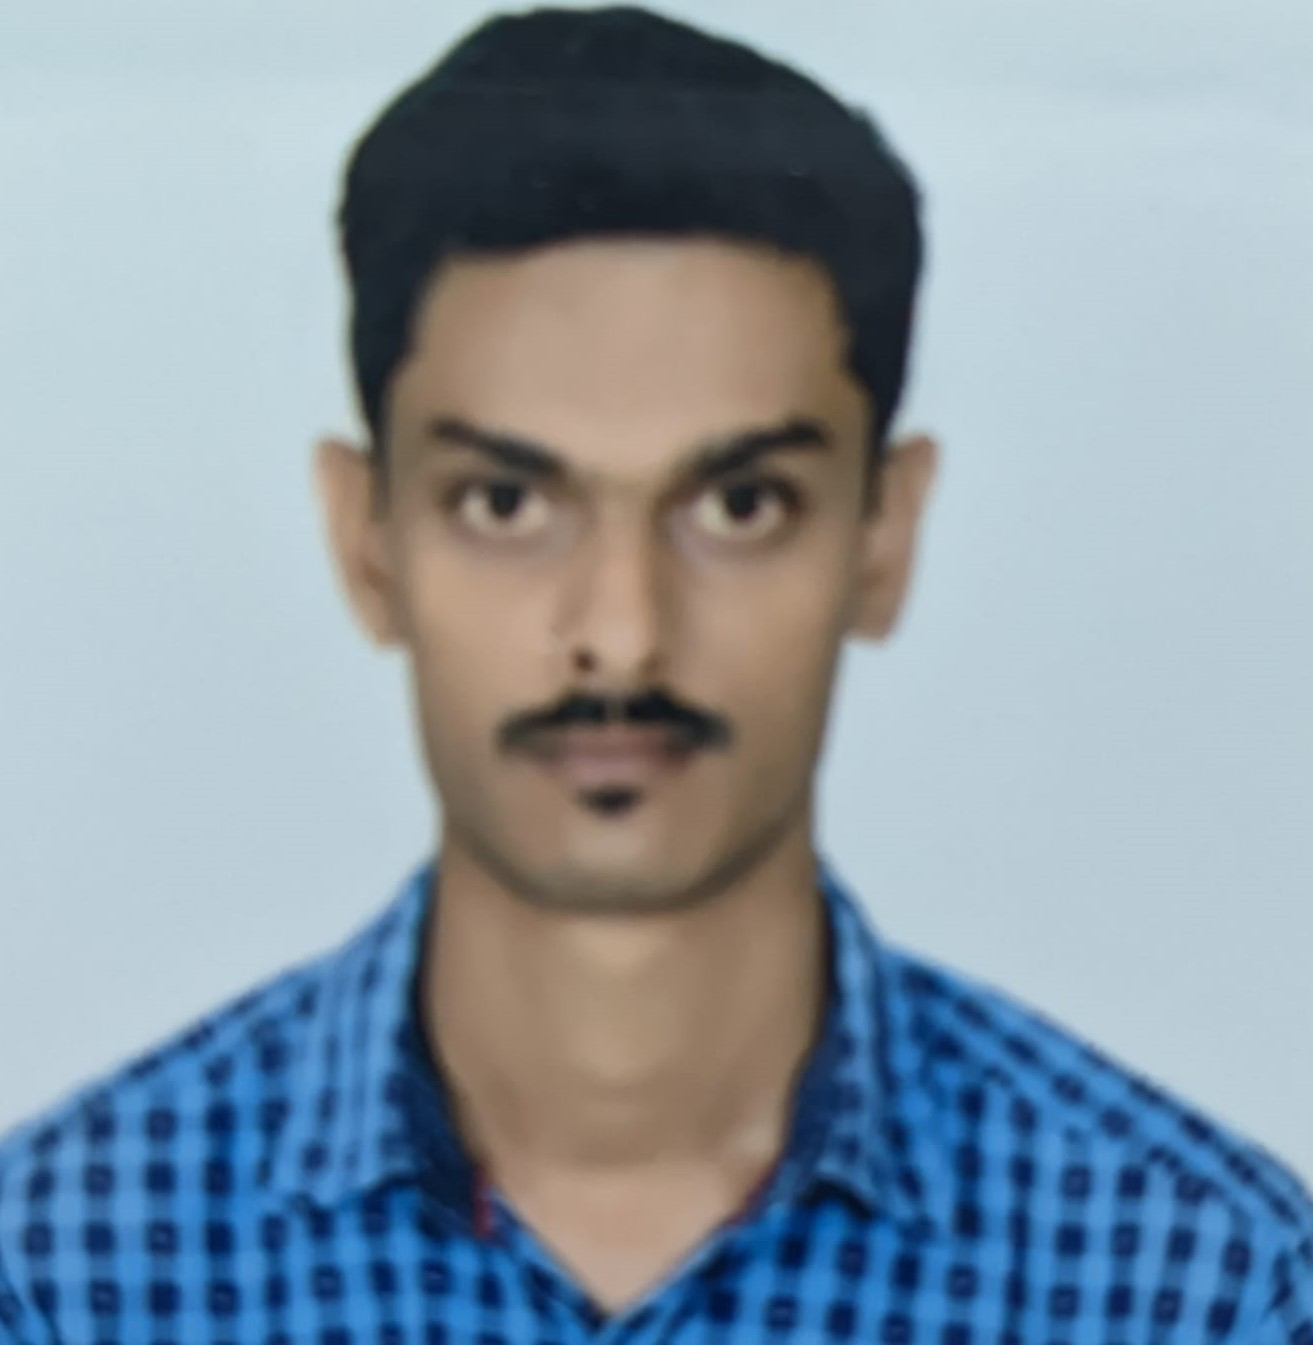

In [27]:
# Game 1: Age Progression/Regression
# Set the attributes of a random person you want to test
age = 38
gender = MALE
race = OTHER
image_path=r"C:\Users\KIIT\Desktop\WhatsApp Image 2023-03-30 at 23.27.37.jpg"
#image_path = random.choice(glob.glob(os.path.join(dset_path, '{a}_{g}_{r}*'.format(a=age, g=gender, r=race))))

Image(filename=image_path)  # Will select and show a person with the attributes you selected

[23:01] Saved test result to C:\Users\KIIT\AppData\Local\Temp\menifa.png


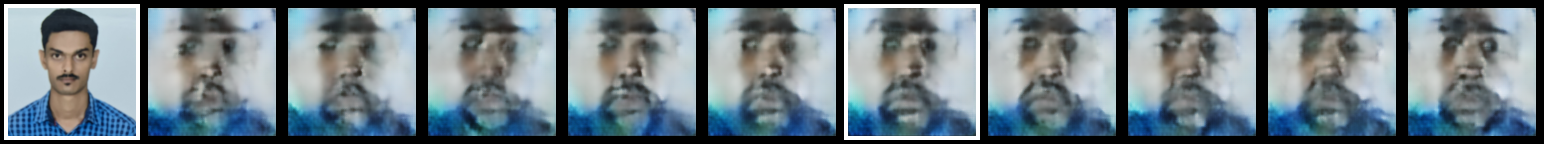

In [28]:
# Game 1: Age Progression/Regression
image_tensor = pil_to_model_tensor_transform(pil_loader(image_path))
Image(filename=net.test_single(image_tensor=image_tensor, age=age, gender=gender, target=tempdir, watermark=False))